In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
import shap

from scipy.stats import kurtosis, skew
from scipy.signal import find_peaks

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, roc_auc_score
from sklearn.inspection import (partial_dependence, PartialDependenceDisplay)

import random
import ruptures as rpt

In [2]:
def print_decision_rules(rf):

    for tree_idx, est in enumerate(rf.estimators_):
        tree = est.tree_
        assert tree.value.shape[1] == 1 # no support for multi-output

        print('TREE: {}'.format(tree_idx))

        iterator = enumerate(zip(tree.children_left, tree.children_right, tree.feature, tree.threshold, tree.value))
        for node_idx, data in iterator:
            left, right, feature, th, value = data

            # left: index of left child (if any)
            # right: index of right child (if any)
            # feature: index of the feature to check
            # th: the threshold to compare against
            # value: values associated with classes

            # for classifier, value is 0 except the index of the class to return
            class_idx = np.argmax(value[0])

            if left == -1 and right == -1:
                print('{} LEAF: return class={}'.format(node_idx, class_idx))
            else:
                print('{} NODE: if feature[{}] < {} then next={} else next={}'.format(node_idx, rf.feature_names_in_[feature], th, left, right))

In [3]:
def statistical_features(arr):
    vmin = np.amin(arr)
    vmax = np.amax(arr)
    mean = np.mean(arr)
    std = np.std(arr)
    return vmin, vmax, mean, std

def shape_features(arr):
    skewness = skew(arr)
    kurt = kurtosis(arr)
    return skewness, kurt

In [4]:
df_lag = pd.read_csv("C:/Users/milena/Documents/tcc/dataset/combinedlagEDA.csv")
train_set = df_lag.iloc[:,0:48]
labels = df_lag.iloc[:,48:49]

In [23]:
#Create a random forest Classifier
clf = RandomForestClassifier(n_estimators=100,max_depth=15)

# Split our data
train, test, train_labels, test_labels = train_test_split(train_set, labels, test_size=0.3, random_state=30)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train, train_labels.values.ravel())

In [28]:
f1score   = f1_score        (test_labels, y_pred, average = 'macro')
recall    = recall_score    (test_labels, y_pred, average = 'macro')
precision = precision_score (test_labels, y_pred, average = 'macro')
accuracy  = accuracy_score  (test_labels, y_pred)
AUC       = roc_auc_score   (train_labels.values.ravel(), clf.predict_proba(train), multi_class='ovr')

print('acc =', accuracy)
print('pre =', precision)
print('recall =', recall) 
print('f1 =', f1score)
print('auc =', AUC)

acc = 0.9539367970005356
pre = 0.9549013281203335
recall = 0.9330728328942076
f1 = 0.9424076412972987
auc = 0.9999991377842775


In [7]:
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(train)
shap_obj = explainer(train)

In [8]:
shap.initjs()

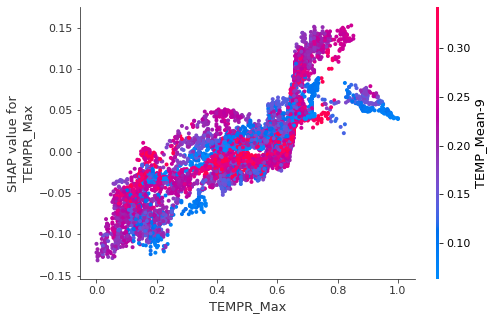

In [9]:
shap.dependence_plot("TEMPR_Max", shap_values[0], train.values, feature_names=train.columns)

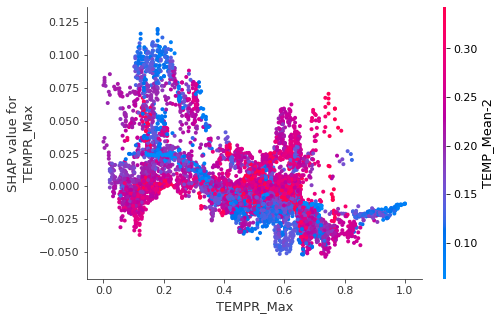

In [10]:
shap.dependence_plot("TEMPR_Max", shap_values[1], train.values, feature_names=train.columns)

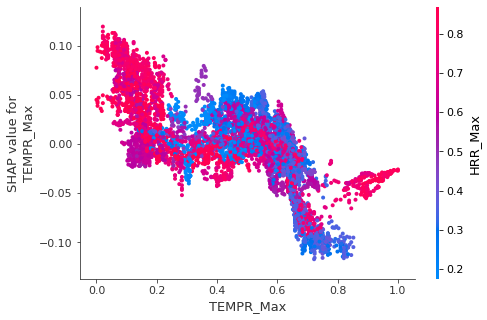

In [11]:
shap.dependence_plot("TEMPR_Max", shap_values[2], train.values, feature_names=train.columns)

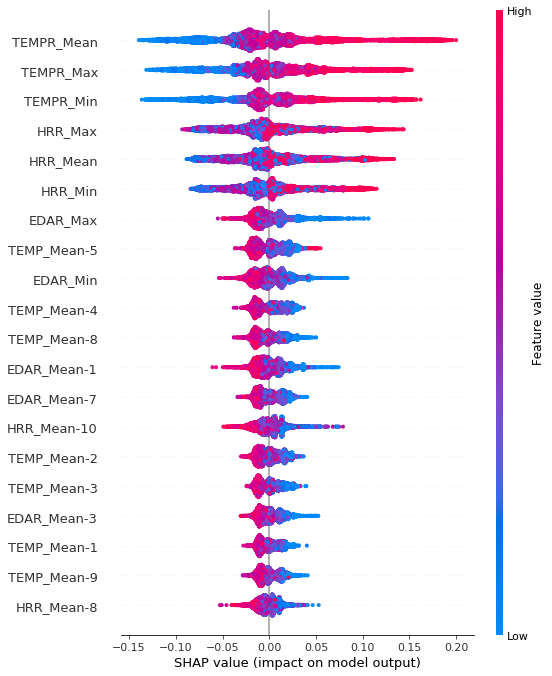

In [12]:
shap.summary_plot(shap_values[0], train.values, feature_names=train.columns)

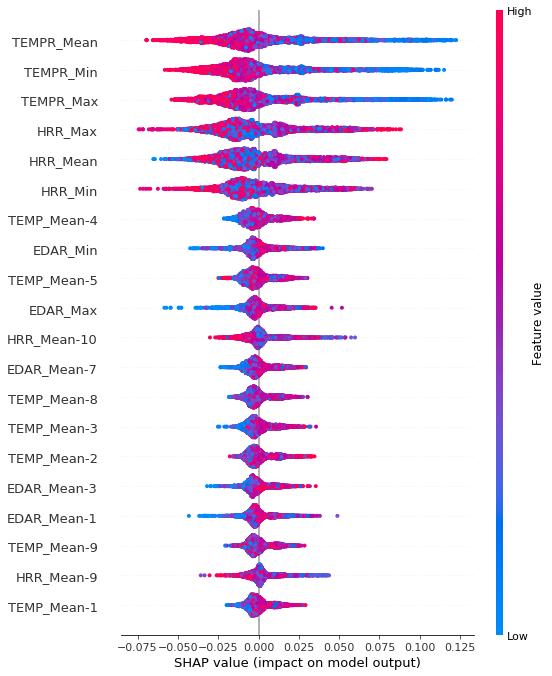

In [13]:
shap.summary_plot(shap_values[1], train.values, feature_names=train.columns)

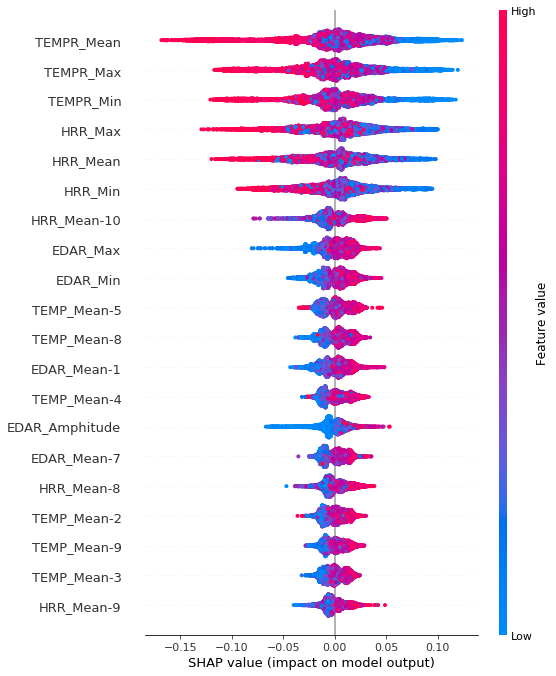

In [14]:
shap.summary_plot(shap_values[2], train.values, feature_names=train.columns)

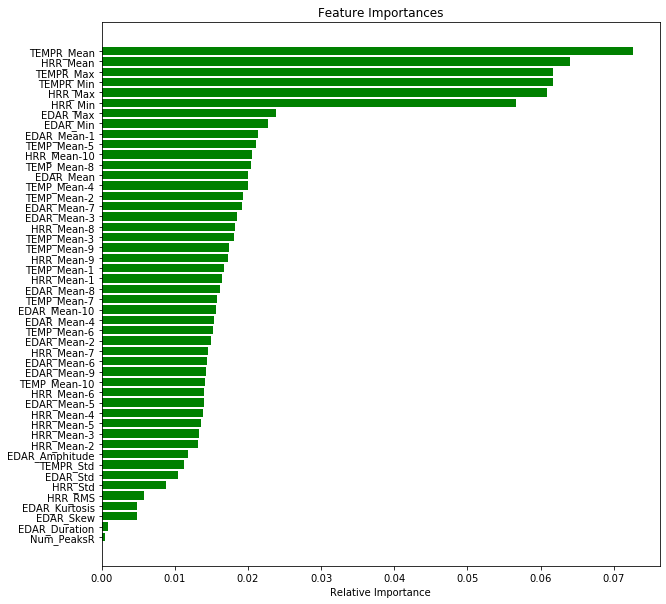

In [15]:
importances = clf.feature_importances_
indices = np.argsort(importances)
features = df_lag.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
explainer.expected_value

array([0.43792217, 0.18148433, 0.3805935 ])

In [17]:
i=180
shap.force_plot(explainer.expected_value[0], shap_values[0][i], train.values[i], feature_names = train.columns)

In [18]:
j=180
shap.force_plot(explainer.expected_value[1], shap_values[0][j], train.values[j], feature_names = train.columns)

In [19]:
i=3567
shap.force_plot(explainer.expected_value[2], shap_values[0][i], train.values[i], feature_names = train.columns)